In [3]:
# Importing the Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
#United States Greenhouse Gas Emissions
US_Gas_data ="data/GH_Em_byGas.csv"
US_Gas_emission = pd.read_csv(US_Gas_data)

In [5]:
US_Gas_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   U.S. Emissions by Gas, MMT CO2 eq.  7 non-null      object 
 1   1990                                7 non-null      float64
 2   1991                                7 non-null      float64
 3   1992                                7 non-null      float64
 4   1993                                7 non-null      float64
 5   1994                                7 non-null      float64
 6   1995                                7 non-null      float64
 7   1996                                7 non-null      float64
 8   1997                                7 non-null      float64
 9   1998                                7 non-null      float64
 10  1999                                7 non-null      float64
 11  2000                                7 non-null   

In [6]:
#Dropping index 4 - Land use and forestry
#US_Gas_emission_New= US_Gas_emission[US_Gas_emission['U.S. Emissions by Gas, MMT CO2 eq.']!= "Land use and forestry carbon stock change",US_Gas_emission['U.S. Emissions by Gas, MMT CO2 eq.']!="Net total" ]
US_Gas_emission_New = US_Gas_emission.drop(columns=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])
US_Gas_emission_New = US_Gas_emission_New.drop([4,5,6])
US_Gas_emission_New

,"U.S. Emissions by Gas, MMT CO2 eq.",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Carbon dioxide,5679.715249,5546.116067,5344.085980,5480.156537,5528.681067,5376.473125,5252.932175,5212.162345,5377.797353,5262.145074,4714.628032,5032.212819
1,Methane,860.381779,839.346840,828.343395,832.018487,825.284949,838.330206,799.318085,822.724448,831.387917,824.663669,807.664701,793.415207
2,Nitrous oxide,415.414114,419.077150,399.153659,430.717412,434.959339,432.652386,414.527389,422.939997,437.226128,417.587789,399.853364,405.122493
3,Fluorinated gases,159.032287,165.219394,162.741420,163.039500,167.613517,170.275887,170.558371,172.317566,172.791340,177.699752,180.193612,187.291710


In [7]:
US_Gas_emission_New.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1778.635857,1742.439863,1683.581113,1726.482984,1739.134718,1704.432901,1659.334005,1657.536089,1704.800685,1670.524071,1525.584927,1604.510557
std,2616.811050,2550.976477,2455.838940,2517.505102,2540.756793,2463.403926,2409.672978,2384.839608,2463.571410,2409.259570,2141.864820,2298.844598
min,159.032287,165.219394,162.741420,163.039500,167.613517,170.275887,170.558371,172.317566,172.791340,177.699752,180.193612,187.291710
25%,351.318657,355.612711,340.050599,363.797934,368.122883,367.058261,353.535135,360.284389,371.117431,357.615779,344.938426,350.664797
50%,637.897947,629.211995,613.748527,631.367950,630.122144,635.491296,606.922737,622.832223,634.307023,621.125729,603.759033,599.268850
75%,2065.215147,2016.039147,1957.279041,1994.053000,2001.133978,1972.865936,1912.721608,1920.083923,1967.990276,1934.034020,1784.405534,1853.114610
max,5679.715249,5546.116067,5344.085980,5480.156537,5528.681067,5376.473125,5252.932175,5212.162345,5377.797353,5262.145074,4714.628032,5032.212819


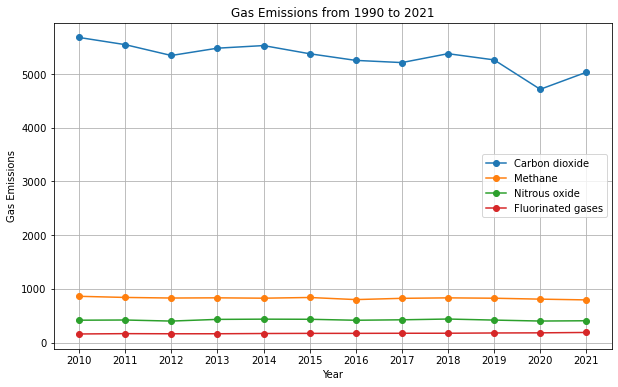

In [8]:
# Set US Emissions by Gas Column as index
US_Gas_emission_New.set_index('U.S. Emissions by Gas, MMT CO2 eq.', inplace=True)
plt.figure(figsize=(10, 6))
for gas in US_Gas_emission_New.index:
    plt.plot(US_Gas_emission_New.columns, US_Gas_emission_New.loc[gas], marker='o', label=gas)

plt.title('Gas Emissions from 1990 to 2021')
plt.xlabel('Year')
plt.ylabel('Gas Emissions')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#United States Co2 Emissions across sectors
US_Sector_data ="data/GH_Em_bySector.csv"
US_Sector_emission = pd.read_csv(US_Sector_data)
US_Sector_emission= US_Sector_emission.drop([6,7])
US_Sector_emission = US_Sector_emission.drop(columns=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])
US_Sector_emission.head(10)

,"U.S. Emissions by Economic Sector, MMT CO2 eq.",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Transportation,1795.175731,1762.312341,1743.453676,1746.588318,1780.757323,1789.136009,1824.096783,1841.552042,1871.294023,1874.274488,1624.943271,1804.305300
1,Electric power industry,2312.771663,2209.959692,2072.405237,2090.722839,2090.858894,1951.461321,1859.182790,1779.214668,1799.127812,1650.495333,1481.835903,1584.081810
2,Industry,1488.580465,1494.923265,1485.523423,1544.374775,1530.641039,1518.109918,1463.052915,1494.544914,1558.002166,1568.208895,1465.430495,1487.265693
3,Agriculture,639.149456,630.736031,622.239249,644.877800,650.515076,647.454217,643.250875,654.241864,670.620627,655.439133,637.186836,635.761357
4,Commercial,430.838755,425.491762,406.441434,429.237535,439.387874,451.668363,435.494596,437.630681,453.705980,461.955049,436.025249,439.156690
5,Residential,355.227222,348.614210,306.222705,356.926235,377.273304,350.199226,326.394589,328.360945,375.821421,382.394713,356.939570,365.554046


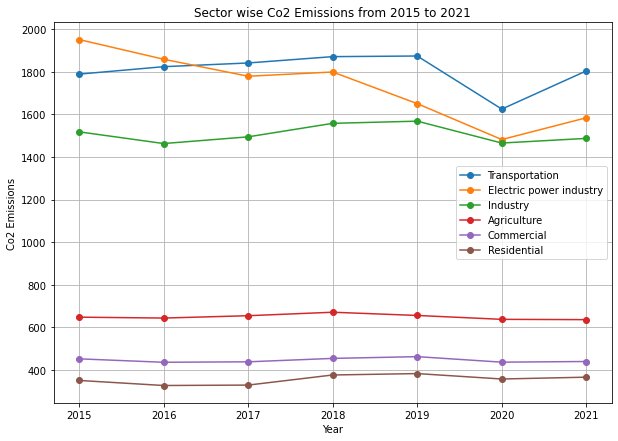

In [10]:
#Sector Wise emission trend from 2015-2021
# Set US Emissions by Sector Column as index
US_Sector_emission.set_index('U.S. Emissions by Economic Sector, MMT CO2 eq.', inplace=True)
#Choose Specific years for plotting 
years_plot= ['2015','2016','2017','2018','2019','2020','2021']
selected_years_plot= US_Sector_emission[years_plot]
plt.figure(figsize=(10, 7))
for sector in selected_years_plot.index:
    plt.plot(selected_years_plot.columns, selected_years_plot.loc[sector], marker='o', label=sector)

plt.title('Sector wise Co2 Emissions from 2015 to 2021')
plt.xlabel('Year')
plt.ylabel('Co2 Emissions')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# State wise Co2 Emissions data files
Co2_data = "data/Statelevel_co2_year_mod.xlsx"
#Statewise_Co2 = "data/Study_results.csv"

In [12]:
# Read the Co2 emissions data and the Statewise Co2
Co2_emission = pd.read_excel(Co2_data)
Co2_emission.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,132.488087,129.546321,122.631497,120.464376,122.633476,119.202912,113.986483,108.594556,112.355761,106.254617,98.431803,108.392103
1,Alaska,37.137256,37.085337,36.155344,34.049265,33.919438,35.027903,33.405683,33.731095,34.515445,34.276830,35.977743,38.872526
2,Arizona,99.486545,97.661505,95.453857,99.309315,97.295433,94.982903,90.860970,90.480865,94.099855,92.555687,80.153897,83.024267
3,Arkansas,66.087471,67.484371,66.255351,68.512485,68.914215,59.054015,62.127003,64.176360,70.785991,65.073337,54.749619,62.024941
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,358.266355,303.815453,324.039053


In [13]:
Co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2010    51 non-null     float64
 2   2011    51 non-null     float64
 3   2012    51 non-null     float64
 4   2013    51 non-null     float64
 5   2014    51 non-null     float64
 6   2015    51 non-null     float64
 7   2016    51 non-null     float64
 8   2017    51 non-null     float64
 9   2018    51 non-null     float64
 10  2019    51 non-null     float64
 11  2020    51 non-null     float64
 12  2021    51 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.3+ KB


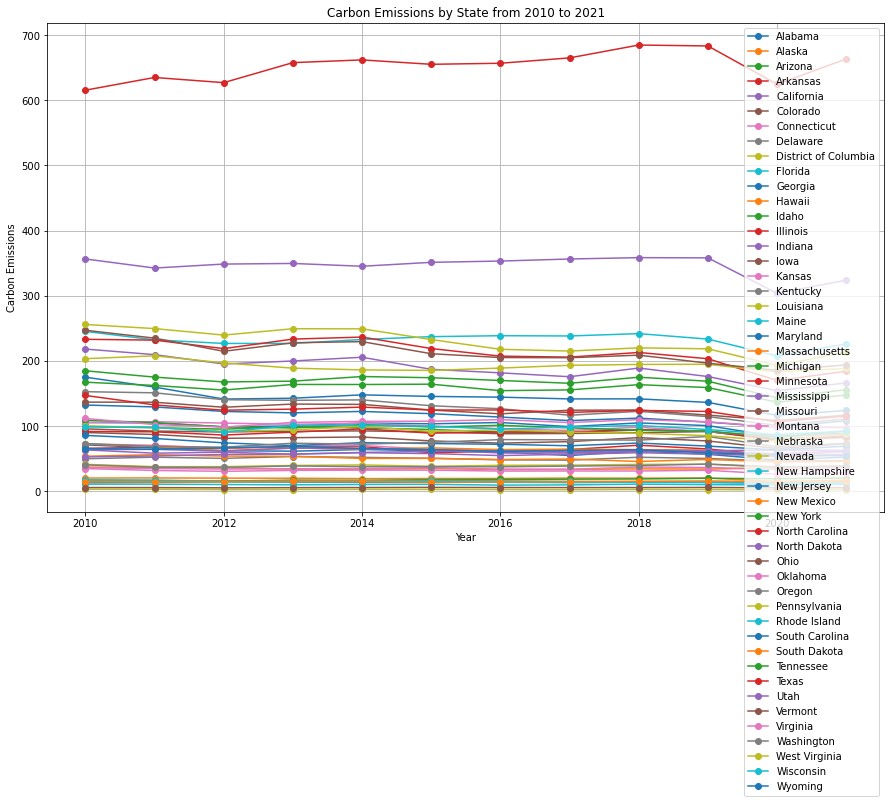

In [14]:
# Set state Column as index
Co2_emission.set_index('State', inplace=True)
plt.figure(figsize=(15,9))
for state in Co2_emission.index:
    plt.plot(Co2_emission.columns, Co2_emission.loc[state], marker='o', label=state)

plt.title('Carbon Emissions by State from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Converting the Sector wise tables to data frames 
Commercial_data = "data/commercial_mod.xlsx"
Commercial_emission = pd.read_excel(Commercial_data)
Electric_data = "data/electric_power_mod.xlsx"
Electric_emission = pd.read_excel(Electric_data)
Industrial_data = "data/industrial_mod.xlsx"
Industrial_emission = pd.read_excel(Industrial_data)
Residential_data = "data/residential_mod.xlsx"
Residential_emission = pd.read_excel(Residential_data)
Transportation_data = "data/transportation_mod .xlsx"
Transportation_emission = pd.read_excel(Transportation_data)

In [16]:
Transportation_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   2010    51 non-null     float64
 2   2011    51 non-null     float64
 3   2012    51 non-null     float64
 4   2013    51 non-null     float64
 5   2014    51 non-null     float64
 6   2015    51 non-null     float64
 7   2016    51 non-null     float64
 8   2017    51 non-null     float64
 9   2018    51 non-null     float64
 10  2019    51 non-null     float64
 11  2020    51 non-null     float64
 12  2021    51 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.3+ KB


In [17]:
Residential_emission.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,2.869146,2.353232,1.760175,2.191387,2.430833,2.129977,1.867282,1.738412,2.254327,2.047132,1.902621,2.050755
1,Alaska,1.686277,1.727448,1.762097,1.557931,1.460893,1.584928,1.499933,1.660980,1.461157,1.445756,1.651749,1.730099
2,Arizona,2.329989,2.410624,2.091453,2.409800,2.029574,2.128286,2.188253,2.064408,2.246021,2.645859,2.574525,2.501845
3,Arkansas,2.325116,2.141526,1.645932,2.213347,2.358555,2.038803,1.660556,1.569039,2.131007,2.066296,1.889573,2.067265
4,California,28.964282,29.719291,27.347505,27.705549,22.904330,23.386526,24.074138,25.055479,24.752577,27.120274,26.631791,26.181076


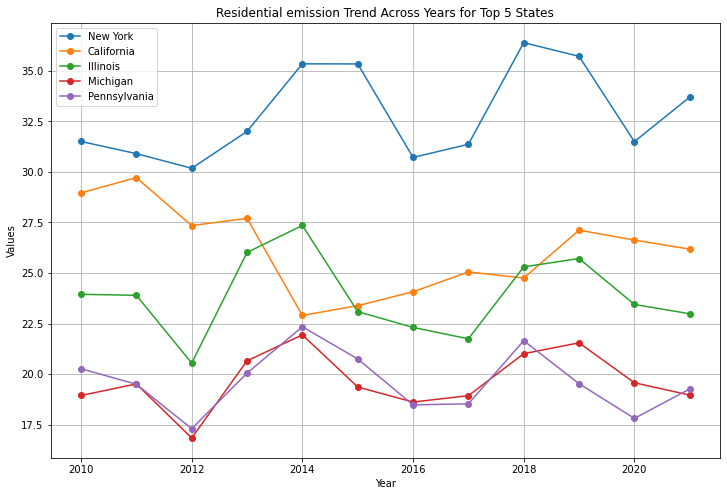

In [101]:
# Calculating total values for each state across the years
Residential_emission['Total'] = Residential_emission.iloc[:, 1:].sum(axis=1)

# Getting the top 5 states with the highest total values
top_5_states_Res = Residential_emission.nlargest(5, 'Total')

# Plotting the trend for the top 5 states
plt.figure(figsize=(12, 8))
for index, state in top_5_states_Res.iterrows():
    plt.plot(Residential_emission.columns[1:-1], state[1:-1], marker='o', label=state['State'])

plt.title('Residential emission Trend Across Years for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

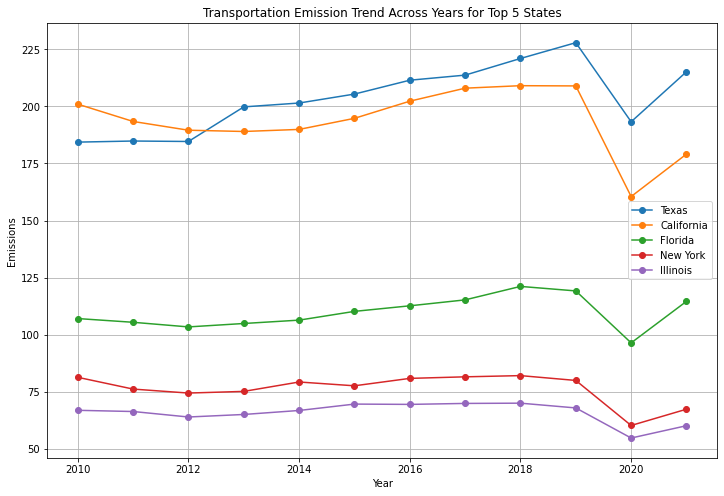

In [18]:
# Calculating total values for each state across the years
Transportation_emission['Total'] = Transportation_emission.iloc[:, 1:].sum(axis=1)

# Getting the top 5 states with the highest total values
top_5_states_Transport = Transportation_emission.nlargest(5, 'Total')

# Plotting the trend for the top 5 states
plt.figure(figsize=(12, 8))
for index, state in top_5_states_Transport.iterrows():
    plt.plot(Transportation_emission.columns[1:-1], state[1:-1], marker='o', label=state['State'])

plt.title('Transportation Emission Trend Across Years for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.show()

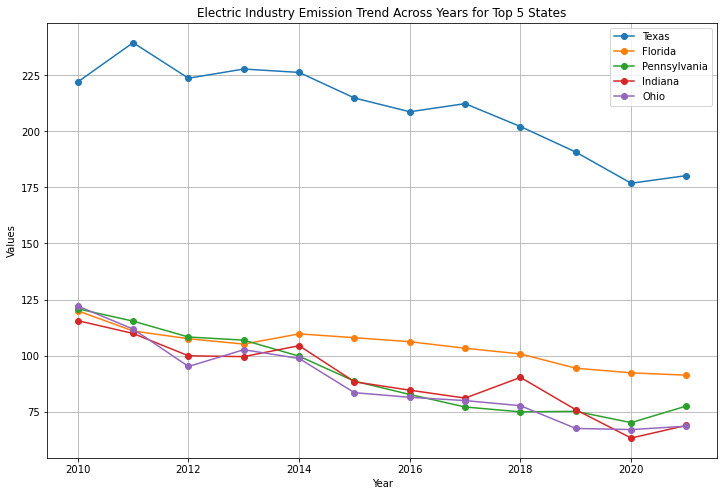

In [19]:
# Calculating total values for each state across the years
Electric_emission['Total'] = Electric_emission.iloc[:, 1:].sum(axis=1)

# Getting the top 5 states with the highest total values
top_5_states_Electric = Electric_emission.nlargest(5, 'Total')

# Plotting the trend for the top 5 states
plt.figure(figsize=(12, 8))
for index, state in top_5_states_Electric.iterrows():
    plt.plot(Electric_emission.columns[1:-1], state[1:-1], marker='o', label=state['State'])

plt.title('Electric Industry Emission Trend Across Years for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

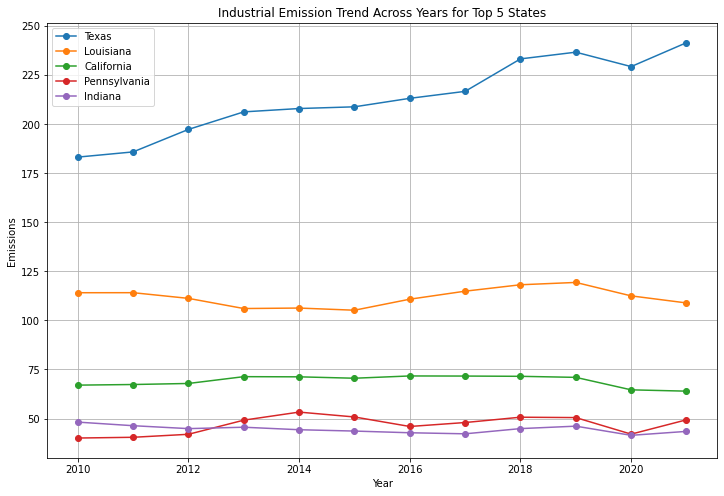

In [20]:
# Calculating total values for each state across the years
Industrial_emission['Total'] = Industrial_emission.iloc[:, 1:].sum(axis=1)

# Getting the top 5 states with the highest total values
top_5_states_Transport = Industrial_emission.nlargest(5, 'Total')

# Plotting the trend for the top 5 states
plt.figure(figsize=(12, 8))
for index, state in top_5_states_Transport.iterrows():
    plt.plot(Transportation_emission.columns[1:-1], state[1:-1], marker='o', label=state['State'])

plt.title('Industrial Emission Trend Across Years for Top 5 States')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#Merging the State Co2 and Commercial Sector Co2 dataframes
merged_Commercial= pd.merge(Co2_emission,Commercial_emission, on='State', suffixes=('_total','_Commercial'))
merged_Commercial.head()

,State,2010_total,2011_total,2012_total,2013_total,2014_total,2015_total,2016_total,2017_total,2018_total,...,2012_Commercial,2013_Commercial,2014_Commercial,2015_Commercial,2016_Commercial,2017_Commercial,2018_Commercial,2019_Commercial,2020_Commercial,2021_Commercial
0,Alabama,132.488087,129.546321,122.631497,120.464376,122.633476,119.202912,113.986483,108.594556,112.355761,...,1.786784,1.836465,1.933392,2.162168,2.216571,2.109312,2.352970,2.229468,2.072646,2.332216
1,Alaska,37.137256,37.085337,36.155344,34.049265,33.919438,35.027903,33.405683,33.731095,34.515445,...,2.658865,2.421547,2.354387,2.584399,2.046540,2.062429,2.043495,2.014915,2.117089,2.303515
2,Arizona,99.486545,97.661505,95.453857,99.309315,97.295433,94.982903,90.860970,90.480865,94.099855,...,2.321155,2.361908,2.229531,2.894365,3.035744,2.900570,2.892804,3.061001,2.846283,3.116109
3,Arkansas,66.087471,67.484371,66.255351,68.512485,68.914215,59.054015,62.127003,64.176360,70.785991,...,2.483742,2.820765,3.079219,3.105793,2.931116,3.029643,3.494563,3.515042,3.315649,3.598295
4,California,356.592180,342.655381,348.750203,349.714192,345.386127,351.421508,353.372145,356.532043,358.605130,...,15.947723,15.968061,15.087112,18.573515,18.831954,18.934092,19.600161,20.060948,18.419568,19.449032


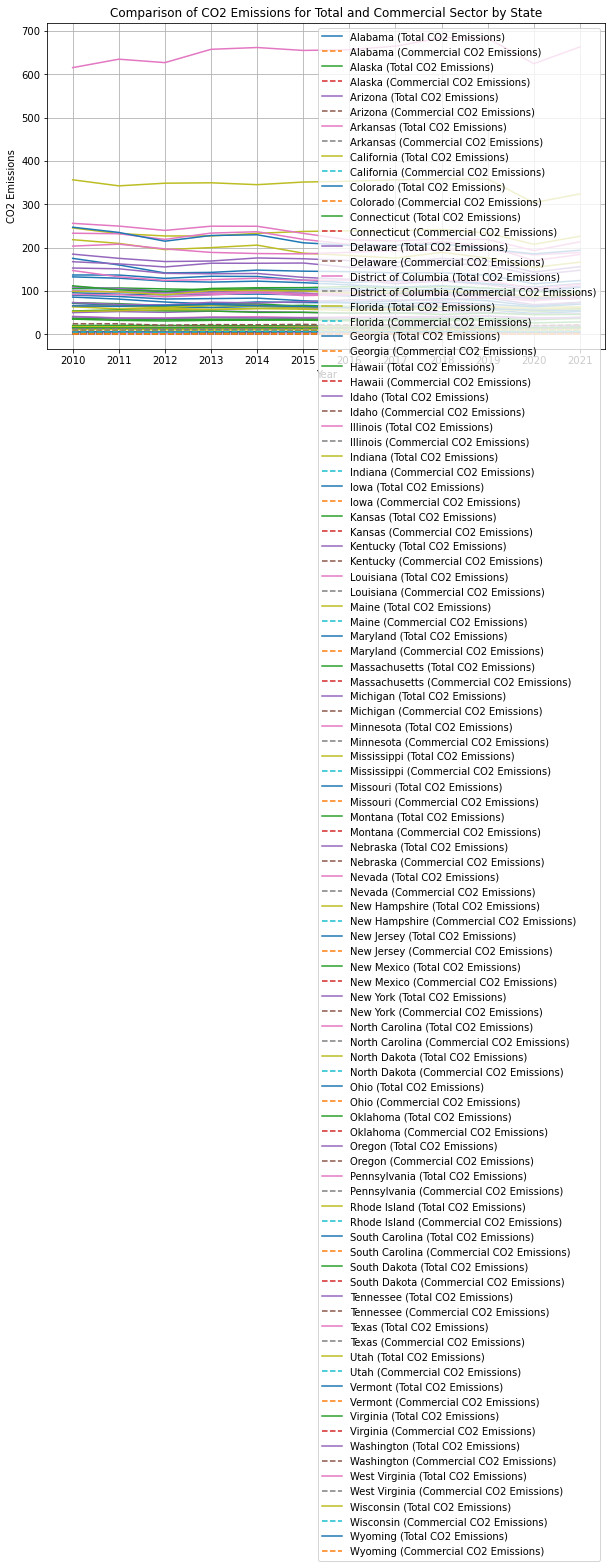

In [22]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Plotting the trends of CO2 emissions for years_total and years_commercial for each state
plt.figure(figsize=(10, 6))

for i, row in merged_Commercial.iterrows():
    state = row['State']
    plt.plot(years, row[[f"{year}_total" for year in years]], label=f'{state} (Total CO2 Emissions)')
    plt.plot(years, row[[f"{year}_Commercial" for year in years]], label=f'{state} (Commercial CO2 Emissions)', linestyle='dashed')

plt.title('Comparison of CO2 Emissions for Total and Commercial Sector by State')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()

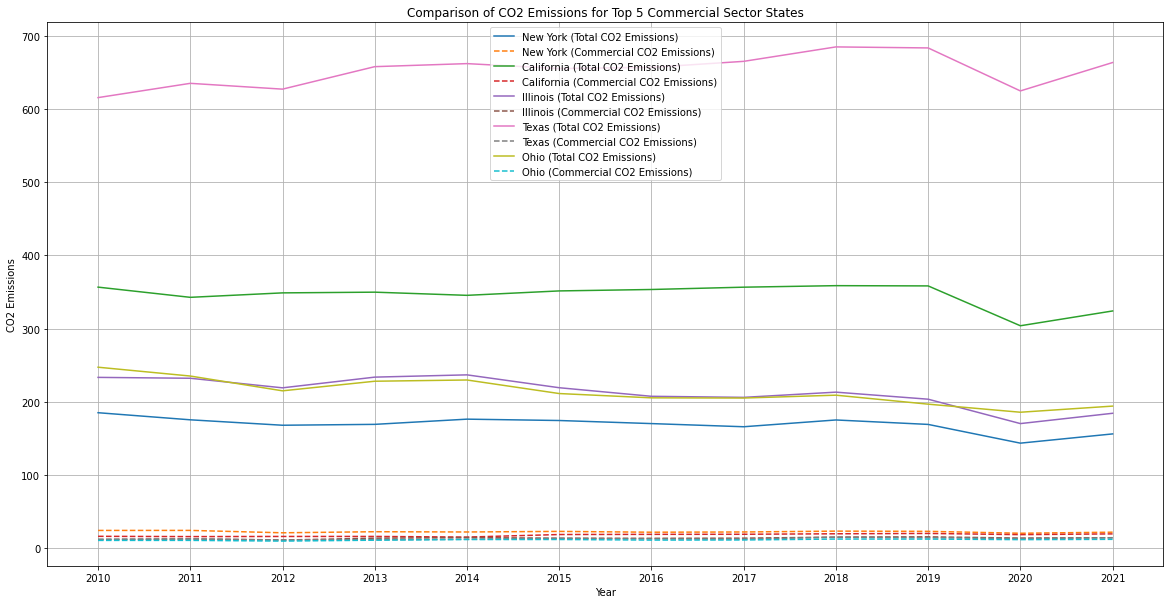

In [23]:
# List of years to analyze
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Plotting the trends of CO2 emissions for state_total and state_commercial for the top 5 states in commercial sector
top_5_commercial_states = merged_Commercial.nlargest(5, '2021_Commercial')['State']

plt.figure(figsize=(20, 10))

for state in top_5_commercial_states:
    row = merged_Commercial[merged_Commercial['State'] == state]
    plt.plot(years, row[[f"{year}_total" for year in years]].values.tolist()[0], label=f'{state} (Total CO2 Emissions)')
    plt.plot(years, row[[f"{year}_Commercial" for year in years]].values.tolist()[0], label=f'{state} (Commercial CO2 Emissions)', linestyle='dashed')

plt.title('Comparison of CO2 Emissions for Top 5 Commercial Sector States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()